### Importación de librerias

In [1]:
import pandas as pd # Manejo de bases de datos
import matplotlib.pyplot as plt #Gráficas
import numpy as np # Operaciones Matemáticas
import seaborn as sns # Gráficas pro
from sympy import init_session # Uso de Latex
from scipy.spatial import ConvexHull # Crear la región de cluster
import warnings # Eliminar las advertencias


warnings.filterwarnings('ignore') # Ignorar advertencias

In [2]:
init_session(use_latex=True) # Inicializar latex

IPython console for SymPy 1.10 (Python 3.9.7-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.10/



### Cargar base de datos

In [3]:
df = pd.read_excel("Base_de_datos_materiales.xlsx") # Esta función sirve para leer un excel
df.head()

,Nombre,Familia,Precio [USD/kg],Densidad [kg/m^3],Modulo de Young [GPa],Esfuerzo de Fluencia [MPa],Esfuerzo Último [MPa],Elongación [%],Dureza [Vickers],Tenacidad a la fractura [MPa m^1/2],Temperatura de fusión [K],Fuente,Persona
0,Aerogel,Cerámicos,120.00,10.0,0.001,0.0003,0.016,0.0002,1.0,4.80,773.00,www.matweb,2020-2
1,Manta Aislamiento Zirconia-alumina,Cerámicos,130.00,96.0,205.000,400.0000,1400.000,NaN,100.0,5.60,2281.15,DiaTerm. interempresas. MatWeb,Diego Rojas
2,OXIDO DE SILICIO,Cerámicos,8.00,180.0,66.300,NaN,300.000,NaN,3500.0,0.67,1988.15,MATWEB,2020-2
3,Acetato Butirado de Celulosa,Cerámicos,164.00,800.0,50.000,NaN,300.000,NaN,340.0,2.50,NaN,Matweb. Precio,Nikolai Fandiño
4,Bentonita,Cerámicos,3.12,1360.0,2.000,1.5600,55.000,20.0000,250.0,3.40,1473.15,researchgate . Matweb . skb. marphil,Diego Rojas


### Procesamiento Inicial base de datos

In [4]:
# Borrar columnas Fuente y Persona
df = df.drop(columns=['Fuente', 'Persona'])
df.head()

,Nombre,Familia,Precio [USD/kg],Densidad [kg/m^3],Modulo de Young [GPa],Esfuerzo de Fluencia [MPa],Esfuerzo Último [MPa],Elongación [%],Dureza [Vickers],Tenacidad a la fractura [MPa m^1/2],Temperatura de fusión [K]
0,Aerogel,Cerámicos,120.00,10.0,0.001,0.0003,0.016,0.0002,1.0,4.80,773.00
1,Manta Aislamiento Zirconia-alumina,Cerámicos,130.00,96.0,205.000,400.0000,1400.000,NaN,100.0,5.60,2281.15
2,OXIDO DE SILICIO,Cerámicos,8.00,180.0,66.300,NaN,300.000,NaN,3500.0,0.67,1988.15
3,Acetato Butirado de Celulosa,Cerámicos,164.00,800.0,50.000,NaN,300.000,NaN,340.0,2.50,NaN
4,Bentonita,Cerámicos,3.12,1360.0,2.000,1.5600,55.000,20.0000,250.0,3.40,1473.15


In [5]:
print("La base de datos cuenta con {}  materiales".format(df.shape[0]))

La base de datos cuenta con 391  materiales


In [6]:
## Extraer nombres de las columnas
columns = df.columns.values.tolist()
columns

['Nombre',
 'Familia',
 'Precio [USD/kg]',
 'Densidad [kg/m^3]',
 'Modulo de Young [GPa]',
 'Esfuerzo de Fluencia [MPa]',
 'Esfuerzo Último [MPa]',
 'Elongación [%]',
 'Dureza [Vickers]',
 'Tenacidad a la fractura [MPa m^1/2]',
 'Temperatura de fusión [K]']

### Gráficar distribución datos material

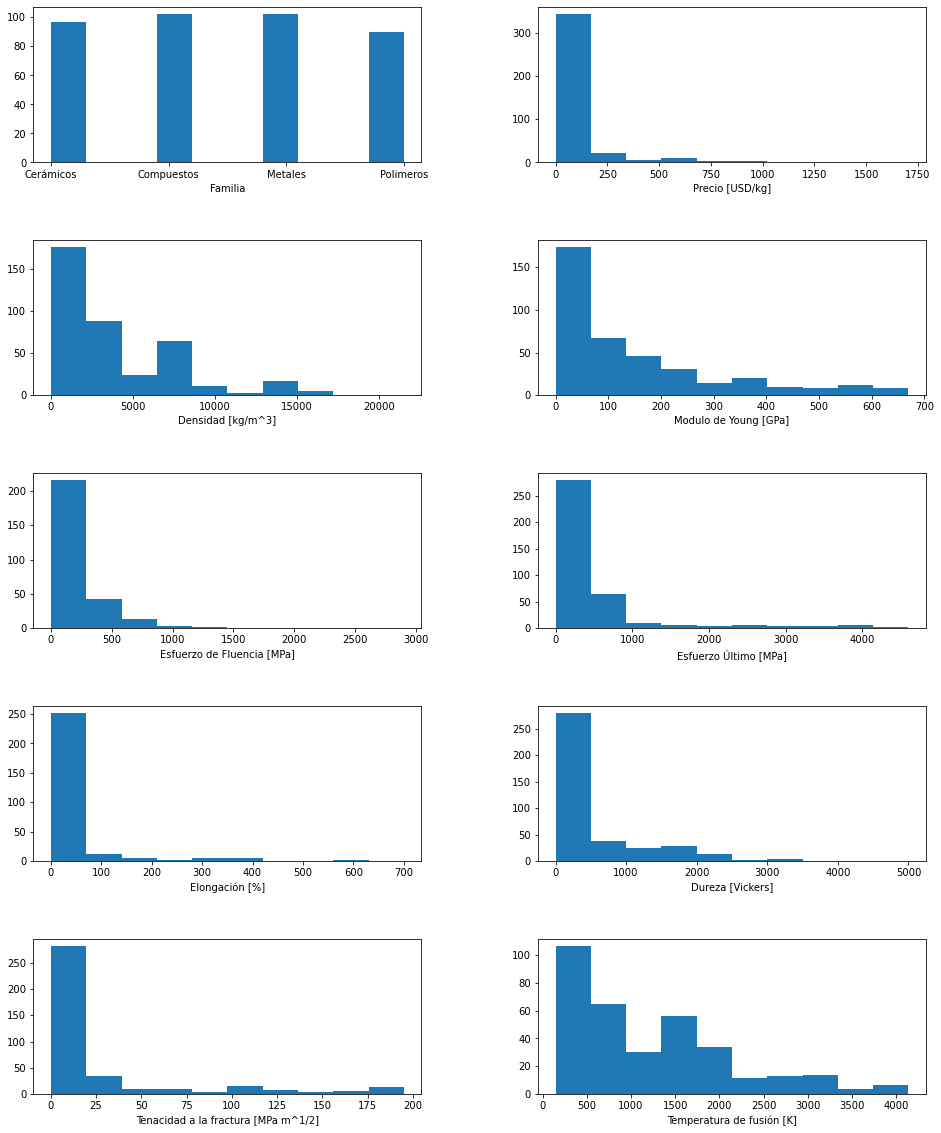

In [7]:
%matplotlib inline
columns_array = np.array(columns[1:]) # Convertir la lista de columnas a un arreglo sin el nombre de los materiales
columns_reshape = columns_array.reshape(5,2) # Redimensinando el arreglo  

fig, ax = plt.subplots(5, 2, figsize=(16,20)) # Se crea la malla subplot
fig.subplots_adjust(hspace=0.5, wspace=0.3) #  Espacio entre las gráficas

# Ciclo para gráficar los datos
for i in range(5):
    for j in range(2):
        ax[i][j].hist(df[columns_reshape[i][j]])
        ax[i][j].set(xlabel=columns_reshape[i][j])

### Selección de pareja de Propiedades

In [8]:
# Creación de un arreglo para numerar las propiedades

propiedades = columns[2:]
numero = np.linspace(1,len(propiedades),len(propiedades)).astype(int).tolist()

mat = np.array(list(zip(numero,propiedades)))

In [9]:
print(mat)
print(" ")

N1 = int(input("Ingrese el número de la primera propiedad [1-9] (Eje Y): "))
P1 = propiedades[N1-1] # Nombre de la primera propiedad (Y)

N2 = int(input("Ingrese el número de la segunda propiedad [1-9] (Eje X): "))
P2 = propiedades[N2-1] # Nombre de la segunda propiedad (Y)
print(" ")
print("Usted ha seleccionado {} (Eje Y) y {} (Eje X)".format(P1,P2))


[['1' 'Precio [USD/kg]']
 ['2' 'Densidad [kg/m^3]']
 ['3' 'Modulo de Young [GPa]']
 ['4' 'Esfuerzo de Fluencia [MPa]']
 ['5' 'Esfuerzo Último [MPa]']
 ['6' 'Elongación [%]']
 ['7' 'Dureza [Vickers]']
 ['8' 'Tenacidad a la fractura [MPa m^1/2]']
 ['9' 'Temperatura de fusión [K]']]
 
Ingrese el número de la primera propiedad [1-9] (Eje Y): 3
Ingrese el número de la segunda propiedad [1-9] (Eje X): 2
 
Usted ha seleccionado Modulo de Young [GPa] (Eje Y) y Densidad [kg/m^3] (Eje X)


In [10]:
# Siglas de las propieades de la base de datos
siglas = symbols(["C","rho","E","sigma_y","sigma_U","L","H","K_{IC}","T_F"])
siglas

In [11]:
# Definición de las siglas de las propiedades ingresadas por el usuario
s1 = siglas[N1-1]
s2 = siglas[N2-1]
s1,s2

### Definición Índice de Materiales

In [12]:
# Exponente Propiedad 1
fr1 = input("El exponente de {} es fracción [Y/N]: ".format(P1))
if fr1 == "Y":
    num1, den1 = input("Ingrese el exponente de {}: ".format(P1)).split("/")
    exp1 = int(num1)/int(den1)
else:
    exp1 = int(input("Ingrese el exponente de {}: ".format(P1)))
    
# Exponente Propiedad 2
fr2 = input("El exponente de {} es fracción [Y/N]: ".format(P2))
if fr2 == "Y":
    num2, den2 = input("Ingrese el exponente de {}: ".format(P2)).split("/")
    exp2 = int(num2)/int(den2)
else:
    exp2 = int(input("Ingrese el exponente de {}: ".format(P2)))

El exponente de Modulo de Young [GPa] es fracción [Y/N]: Y
Ingrese el exponente de Modulo de Young [GPa]: 1/3
El exponente de Densidad [kg/m^3] es fracción [Y/N]: N
Ingrese el exponente de Densidad [kg/m^3]: -1


In [13]:
print("El índice es:")
indice = (s1**(exp1))*(s2**(exp2))
indice

El índice es:


### Definción orientación de búsqueda

In [14]:
if exp1 > 0 and exp2 > 0:
    ori = "max-max"
elif exp1 > 0 and exp2 <0:
    ori = "max-min"
elif exp1 < 0 and exp2 > 0:
    ori = "min-max"
else:
    ori = "min-min"
ori

'max-min'

### Ajuste de base de datos con base en los índices

In [15]:
df["Indice"] = (df[P1]**exp1)*(df[P2]**exp2)
df.head()

,Nombre,Familia,Precio [USD/kg],Densidad [kg/m^3],Modulo de Young [GPa],Esfuerzo de Fluencia [MPa],Esfuerzo Último [MPa],Elongación [%],Dureza [Vickers],Tenacidad a la fractura [MPa m^1/2],Temperatura de fusión [K],Indice
0,Aerogel,Cerámicos,120.00,10.0,0.001,0.0003,0.016,0.0002,1.0,4.80,773.00,0.010000
1,Manta Aislamiento Zirconia-alumina,Cerámicos,130.00,96.0,205.000,400.0000,1400.000,NaN,100.0,5.60,2281.15,0.061421
2,OXIDO DE SILICIO,Cerámicos,8.00,180.0,66.300,NaN,300.000,NaN,3500.0,0.67,1988.15,0.022485
3,Acetato Butirado de Celulosa,Cerámicos,164.00,800.0,50.000,NaN,300.000,NaN,340.0,2.50,NaN,0.004605
4,Bentonita,Cerámicos,3.12,1360.0,2.000,1.5600,55.000,20.0000,250.0,3.40,1473.15,0.000926


In [16]:
# Valores Máximos y Mínimos de la Propiedad 1
max1 = df[P1].max()
min1 = df[P1].min()

s1,min1,max1

In [17]:
# Valores Máximos y Mínimos de la Propiedad 2
max2 = df[P2].max()
min2 = df[P2].min()

s2,min2,max2

In [18]:
# Reordernar dataframe con base en los índices
df_ind = df.sort_values(by='Indice', ascending=False)
df_ind.head()

,Nombre,Familia,Precio [USD/kg],Densidad [kg/m^3],Modulo de Young [GPa],Esfuerzo de Fluencia [MPa],Esfuerzo Último [MPa],Elongación [%],Dureza [Vickers],Tenacidad a la fractura [MPa m^1/2],Temperatura de fusión [K],Indice
301,Silicon RTV Room Temperature Vulcanizing,Polimeros,6.8,1.1,0.05,30.0,165.0,145.0,457.0,0.70,478.15,0.334912
1,Manta Aislamiento Zirconia-alumina,Cerámicos,130.0,96.0,205.00,400.0,1400.0,NaN,100.0,5.60,2281.15,0.061421
302,Poliestireno (PS),Polimeros,0.8,30.0,3.20,30.0,50.0,2.5,75.0,0.40,543.15,0.049120
2,OXIDO DE SILICIO,Cerámicos,8.0,180.0,66.30,NaN,300.0,NaN,3500.0,0.67,1988.15,0.022485
100,Cymat A35620SC 020SS Stabilized Aluminum Foam,Compuestos,13.7,200.1,24.00,53.0,70.0,9.2,12.0,1.94,573.00,0.014415


In [19]:
# Cantidad de Materiales a Filtrar
mat = int(input("Ingrese el número de Materiales a Filtrar: "))

Ingrese el número de Materiales a Filtrar: 20


In [20]:
# Dataframe filtrado de acuerdo con el número de materiales
df_filt = df_ind.head(mat)
df_filt

,Nombre,Familia,Precio [USD/kg],Densidad [kg/m^3],Modulo de Young [GPa],Esfuerzo de Fluencia [MPa],Esfuerzo Último [MPa],Elongación [%],Dureza [Vickers],Tenacidad a la fractura [MPa m^1/2],Temperatura de fusión [K],Indice
301,Silicon RTV Room Temperature Vulcanizing,Polimeros,6.80,1.1,0.050,30.0000,165.0000,145.0000,457.0,0.70,478.15,0.334912
1,Manta Aislamiento Zirconia-alumina,Cerámicos,130.00,96.0,205.000,400.0000,1400.0000,NaN,100.0,5.60,2281.15,0.061421
302,Poliestireno (PS),Polimeros,0.80,30.0,3.200,30.0000,50.0000,2.5000,75.0,0.40,543.15,0.049120
2,OXIDO DE SILICIO,Cerámicos,8.00,180.0,66.300,NaN,300.0000,NaN,3500.0,0.67,1988.15,0.022485
100,Cymat A35620SC 020SS Stabilized Aluminum Foam,Compuestos,13.70,200.1,24.000,53.0000,70.0000,9.2000,12.0,1.94,573.00,0.014415
0,Aerogel,Cerámicos,120.00,10.0,0.001,0.0003,0.0160,0.0002,1.0,4.80,773.00,0.010000
303,Celulosa,Polimeros,0.50,130.0,1.600,40.0000,50.0000,1.3000,63.0,1.57,340.15,0.008997
101,Compuestos aplicados 8007 Poliéster SMC,Compuestos,1.77,247.0,8.960,43.7000,89.6000,0.7000,67.0,1.80,477.00,0.008409
105,Madera de fresno negro americano,Compuestos,3.00,460.0,34.000,70.0300,96.0000,NaN,2400.0,6.90,NaN,0.007043
118,S26T,Compuestos,75.00,1220.0,505.000,NaN,1500.0000,NaN,1570.0,10.80,NaN,0.006527


### Cálculo línea de filtrado

In [21]:
# Se calcula la constante de proporción c = P1^(exp1)*P2^(exp2)
c = (df_filt[P1].iloc[-1])**(exp1)*(df_filt[P2].iloc[-1])**(exp2) 

# Se calculan los valores máximos y mínimos de la línea 
ymin = (c/(min2**(exp2)))**(1/exp1)
ymax = (c/(max2**(exp2)))**(1/exp1)

### Gráfica pareja propiedades

In [22]:
#Contorno que definen los puntos de materiales

df1 = df[["Familia",P2,P1]] # Datafame de solo la pareja de propiedades
df1 = df1.dropna() # Borrar todos los NaN
materiales = df1.to_numpy() # Convertir a un arreglo

# Coordenadas del contorno
puntos_ceramicos = []
puntos_compuestos = []
puntos_polimeros = []
puntos_metales = []

# Separación de puntos por materiales 
for i in range(len(materiales)):
    if materiales[i][0] == "Cerámicos":
        puntos_ceramicos.append(materiales[i][1:])
    elif materiales[i][0] == "Compuestos":
        puntos_compuestos.append(materiales[i][1:])
    elif materiales[i][0] == "Polimeros":
        puntos_polimeros.append(materiales[i][1:])
    elif materiales[i][0] == "Metales":
        puntos_metales.append(materiales[i][1:])
        
# Creación de los contornos
hull_ceramicos = ConvexHull(puntos_ceramicos)
hull_compuestos = ConvexHull(puntos_compuestos)
hull_polimeros = ConvexHull(puntos_polimeros)
hull_metales = ConvexHull(puntos_metales)

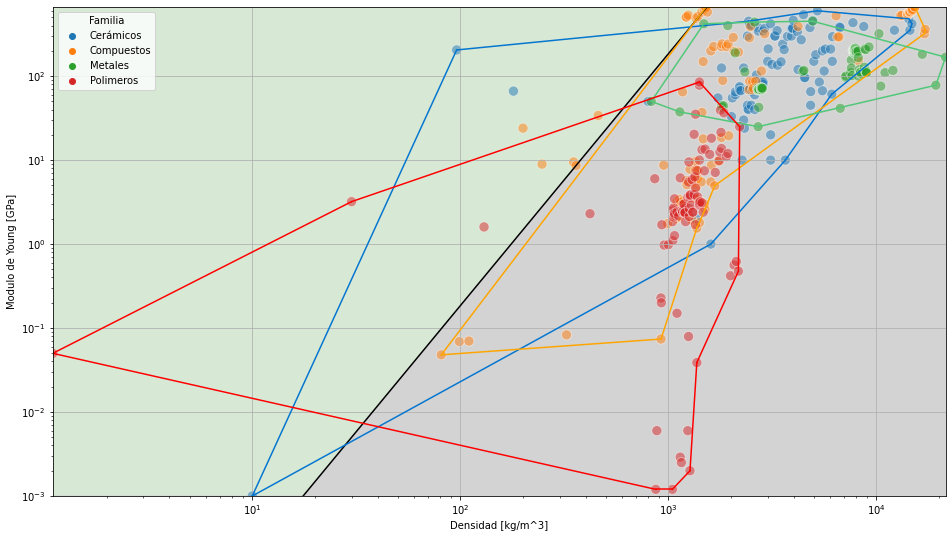

In [23]:
# La gráfica no queda Inline para poder hacer zoom 
%matplotlib inline

f, ax = plt.subplots(figsize=(16, 9)) #Se define el tamaño de la gráfica

ax.set(xscale="log", yscale="log", xlim = (min2, max2), ylim = (min1, max1)) # Se establece el tipo de escala y limites 

sns.scatterplot(x=P2, y=P1, data=df, hue="Familia", s = 100, alpha = 0.5) # Se gráfican los punto de materiales

ax.plot([min2,max2],[ymin,ymax],"k") # Se gráfica la línea de filtrado negro

# Sombreado de selección hacia arriba
if ori == "max-min" or ori == "max-max":
    # x valores de x, y1 valores de la linea, y2 dirección de sombreado, color hexadecial, zorder = 0 evita borrar puntos sns
    ax.fill_between(x = [min2, max2], y1 = [ymin, ymax], y2=[max1,max1], color="#d7e8d5", zorder = 0) # verde selección
    ax.fill_between(x = [min2, max2], y1 = [ymin, ymax], y2=[min1,min1], color="#d3d3d3", zorder = 0) # gris no selección

# Sombreado de selección hacia abajo
elif ori == "min-max" or ori == "min-min":
    # x valores de x, y1 valores de la linea, y2 dirección de sombreado, color hexadecial, zorder = 0 evita borrar puntos sns
    ax.fill_between(x = [min2, max2], y1 = [ymin, ymax], y2=[max1,max1], color="#d3d3d3", zorder = 0) # gris no selección
    ax.fill_between(x = [min2, max2], y1 = [ymin, ymax], y2=[min1,min1], color="#d7e8d5", zorder = 0) # verde selección

    
# Gráfica de los contornos 
for simplex in hull_ceramicos.simplices:
    plt.plot(np.array(puntos_ceramicos, dtype = "float")[simplex,0], 
             np.array(puntos_ceramicos, dtype = "float")[simplex,1], 
             color = "#0476D0", label = "Cerámicos")
    
for simplex in hull_compuestos.simplices:
    plt.plot(np.array(puntos_compuestos, dtype = "float")[simplex,0], 
             np.array(puntos_compuestos, dtype = "float")[simplex,1], 
             color = "#FFA500")

for simplex in hull_metales.simplices:
    plt.plot(np.array(puntos_metales, dtype = "float")[simplex,0], 
             np.array(puntos_metales, dtype = "float")[simplex,1], 
             color = "#50C878")
    
for simplex in hull_polimeros.simplices:
    plt.plot(np.array(puntos_polimeros, dtype = "float")[simplex,0], 
             np.array(puntos_polimeros, dtype = "float")[simplex,1], 
             color = "#FF0000")
    
ax.grid() # Malla